<blockquote>
    <h1>Exercise 9.4</h1>
    <p>Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.</p>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

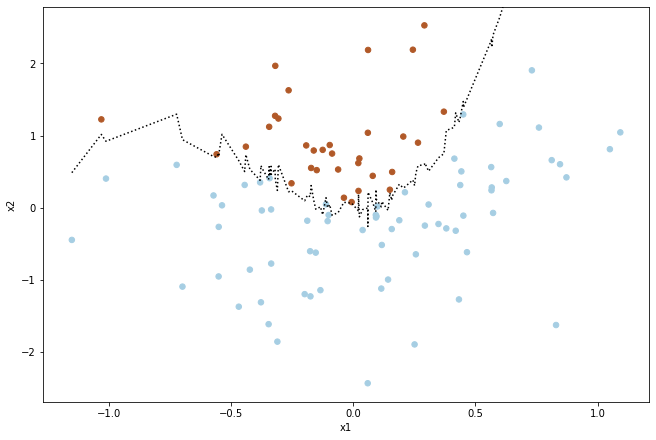

In [2]:
np.random.seed(1)
n = 100
x1 = np.sort(np.random.normal(size=n, loc=0, scale=0.5))
x2 = np.random.normal(size=n, loc=0, scale=1)
f = 4*x1**3 + 5*x1**2 + np.random.normal(size=n, loc=0, scale=0.1)
y = np.where(x2 > f, True, False)

x = np.vstack((x1, x2)).T
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2, 
    random_state=1
)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.scatter(x1, x2, c=y, s=30, cmap=plt.cm.Paired)
ylim = ax.get_ylim()
_ = ax.plot(x1, f, linestyle=':', color='black')
_ = ax.set_ylim(ylim)
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')

In [3]:
# support vector classifier
# use cross validation to find the optimum value for C
linear_svm_class = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', SVC(kernel='linear')),
])

param_grid={
    'linear_svc__C': np.linspace(0, 0.5, 51),
}

grid_search_linear_svm_class = GridSearchCV(linear_svm_class, param_grid=param_grid, n_jobs=-1)
_ = grid_search_linear_svm_class.fit(x, y)

print(grid_search_linear_svm_class.best_estimator_)
print(grid_search_linear_svm_class.best_score_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 SVC(C=0.03, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
0.74


In [4]:
linear_svm_class_best = grid_search_linear_svm_class.best_estimator_
_ = linear_svm_class_best.fit(x_train, y_train)

y_pred = linear_svm_class_best.predict(x_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = pd.MultiIndex.from_tuples([('actual', 'False'), ('actual', 'True')])
columns = pd.MultiIndex.from_tuples([('predicted', 'False'), ('predicted', 'True')])
cm = pd.DataFrame(cm, columns=columns, index=index)
cm

print(classification_report(y_test, y_pred))

predicted     
                 False True
actual False        15    1
       True          4    0

              precision    recall  f1-score   support

       False       0.79      0.94      0.86        16
        True       0.00      0.00      0.00         4

    accuracy                           0.75        20
   macro avg       0.39      0.47      0.43        20
weighted avg       0.63      0.75      0.69        20



In [5]:
# support vector machine with a polynomial kernel 
# use cross validation to find the optimum value for C and degree
poly_svm_class = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(kernel='poly')),
])

param_grid={
    'poly_svc__C': np.linspace(0, 0.5, 51),
    'poly_svc__degree': range(1, 5),
}

grid_search_poly_svm_class = GridSearchCV(poly_svm_class, param_grid=param_grid, n_jobs=-1)
_ = grid_search_poly_svm_class.fit(x, y)

print(grid_search_poly_svm_class.best_estimator_)
print(grid_search_poly_svm_class.best_score_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_svc',
                 SVC(C=0.21, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
0.76


In [6]:
poly_svm_class_best = grid_search_poly_svm_class.best_estimator_
_ = poly_svm_class_best.fit(x_train, y_train)

y_pred = poly_svm_class_best.predict(x_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = pd.MultiIndex.from_tuples([('actual', 'False'), ('actual', 'True')])
columns = pd.MultiIndex.from_tuples([('predicted', 'False'), ('predicted', 'True')])
cm = pd.DataFrame(cm, columns=columns, index=index)
cm

print(classification_report(y_test, y_pred))

predicted     
                 False True
actual False        16    0
       True          4    0

              precision    recall  f1-score   support

       False       0.80      1.00      0.89        16
        True       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



/home/floris/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# support vector machine with a radial kernel 
# use cross validation to find the optimum value for C and gamma
rbf_svm_class = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_svc', SVC(kernel='rbf')),
])

param_grid={
    'rbf_svc__C': np.linspace(0, 0.5, 51),
    'rbf_svc__gamma': np.linspace(0, 1, 101),
}

grid_search_rbf_svm_class = GridSearchCV(rbf_svm_class, param_grid=param_grid, n_jobs=-1)
_ = grid_search_rbf_svm_class.fit(x, y)

print(grid_search_rbf_svm_class.best_estimator_)
print(grid_search_rbf_svm_class.best_score_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rbf_svc',
                 SVC(C=0.37, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.31,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
0.9099999999999999


In [8]:
rbf_svm_class_best = grid_search_rbf_svm_class.best_estimator_
_ = rbf_svm_class_best.fit(x_train, y_train)

y_pred = rbf_svm_class_best.predict(x_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = pd.MultiIndex.from_tuples([('actual', 'False'), ('actual', 'True')])
columns = pd.MultiIndex.from_tuples([('predicted', 'False'), ('predicted', 'True')])
cm = pd.DataFrame(cm, columns=columns, index=index)
cm

print(classification_report(y_test, y_pred))

predicted     
                 False True
actual False        15    1
       True          0    4

              precision    recall  f1-score   support

       False       1.00      0.94      0.97        16
        True       0.80      1.00      0.89         4

    accuracy                           0.95        20
   macro avg       0.90      0.97      0.93        20
weighted avg       0.96      0.95      0.95        20



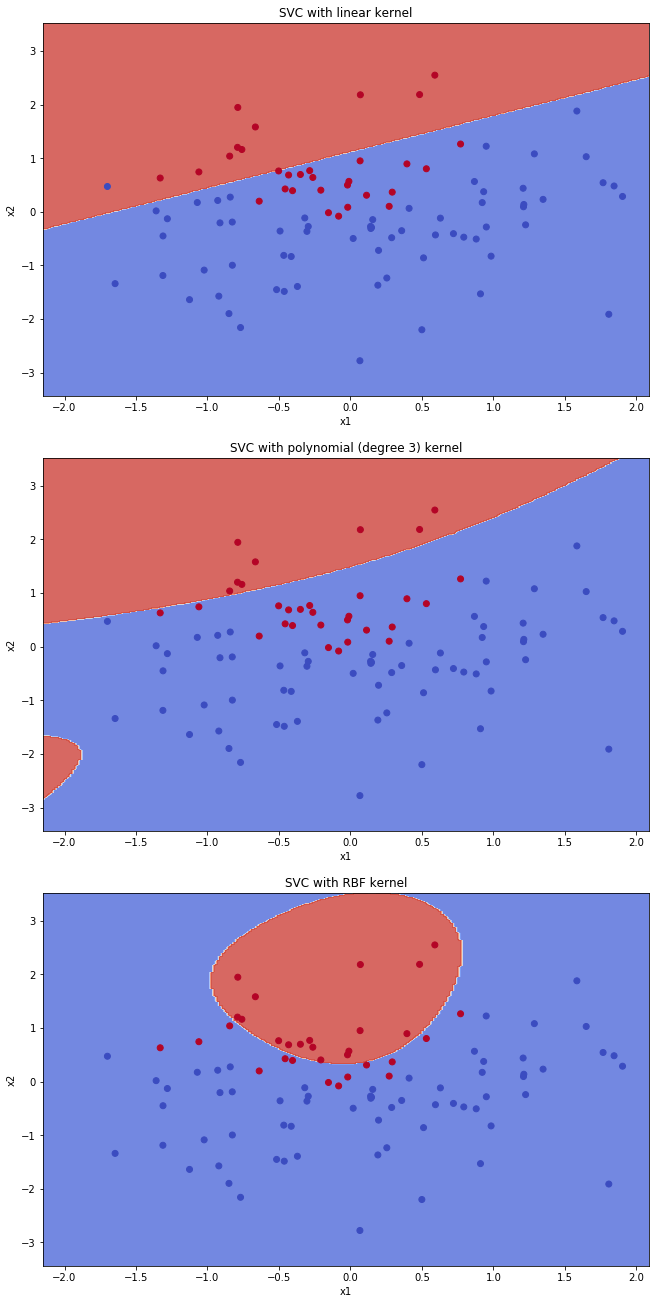

In [9]:
# create a mesh to plot in
h = 0.02  # step size in the mesh
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))
# title for the plots
degree_optimum = grid_search_poly_svm_class.best_params_['poly_svc__degree']
titles = ['SVC with linear kernel',
          f'SVC with polynomial (degree {degree_optimum}) kernel',
          f'SVC with RBF kernel']

numberOfSubplots = 3
fig, axes = plt.subplots(numberOfSubplots, 1, constrained_layout=True, figsize=(9, 6*numberOfSubplots))
for i, clf in enumerate((linear_svm_class_best, poly_svm_class_best, rbf_svm_class_best)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    ax = axes[i]
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    _ = ax.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)
    _ = ax.scatter(x_standardized[:, 0], x_standardized[:, 1], c=y, cmap=plt.cm.coolwarm)
    _ = ax.set_xlabel('x1')
    _ = ax.set_ylabel('x2')
    _ = ax.set_xlim(xx1.min(), xx1.max())
    _ = ax.set_ylim(xx2.min(), xx2.max())
    _ = ax.set_title(titles[i])